In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
nltk.download("punkt_tab")
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
# initialize paths for data
all_beauty_path = "../data/raw/All_Beauty.jsonl"
handmade_path = "../data/raw/Handmade_Products.jsonl"
health_care_path = "../data/raw/Health_and_Personal_Care.jsonl"

In [135]:
all_beauty_df = pd.read_json(all_beauty_path, lines=True)
handmade_df = pd.read_json(handmade_path, lines=True)
health_care_df = pd.read_json(health_care_path, lines=True)

# ------------- Cleaning -------------

### 1. Reduce data and equlize rating distribution

In [136]:
all_beauty_df = (
    all_beauty_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=10_000, random_state=42)
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_33456\702854490.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


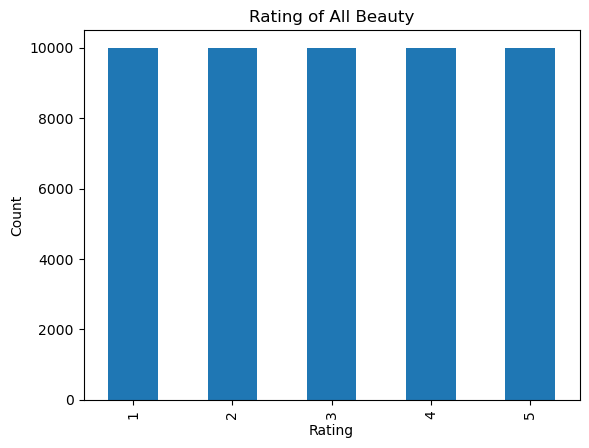

In [137]:
all_beauty_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of All Beauty")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [138]:
handmade_df = (
    handmade_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=10_000, random_state=42),
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_33456\1337226066.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


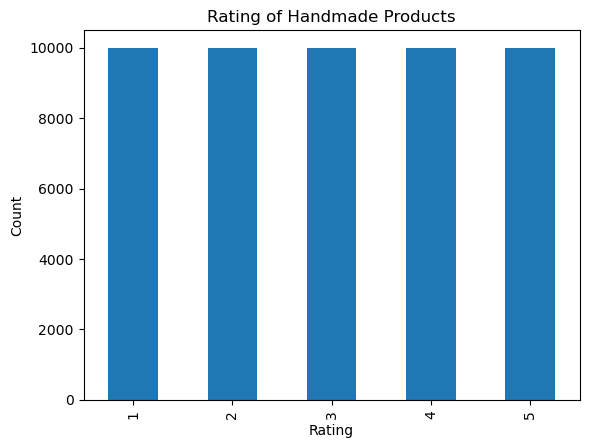

In [139]:
handmade_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Handmade Products")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [140]:
health_care_df = (
    health_care_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=10_000, random_state=42),
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_33456\3335628086.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


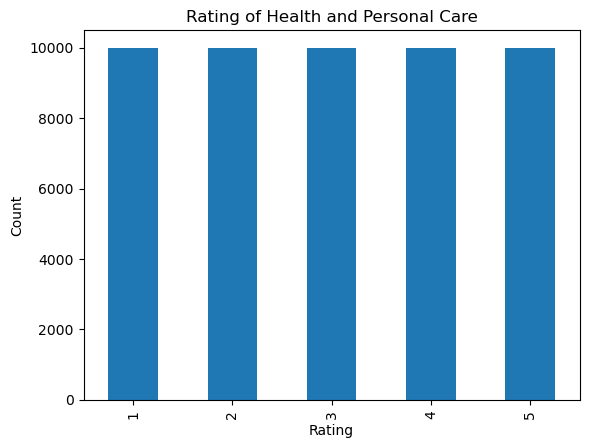

In [141]:
health_care_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Health and Personal Care")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 2. Delete all reviews with NO verified purchases

In [142]:
all_beauty_df = all_beauty_df[all_beauty_df["verified_purchase"] == True].copy()
all_beauty_df["verified_purchase"].value_counts()

verified_purchase
True    45258
Name: count, dtype: int64

In [143]:
handmade_df = handmade_df[handmade_df["verified_purchase"] == True].copy()
handmade_df["verified_purchase"].value_counts()

verified_purchase
True    47340
Name: count, dtype: int64

In [144]:
health_care_df = health_care_df[health_care_df["verified_purchase"] == True].copy()
health_care_df["verified_purchase"].value_counts()

verified_purchase
True    44805
Name: count, dtype: int64

### 3. Delete all reviews with text length < 10

In [145]:
all_beauty_df = all_beauty_df[all_beauty_df["text"].str.len() > 10].copy()
all_beauty_df.shape

(43703, 10)

In [146]:
handmade_df = handmade_df[handmade_df["text"].str.len() > 10].copy()
handmade_df.shape

(45921, 10)

In [147]:
health_care_df = health_care_df[health_care_df["text"].str.len() > 10].copy()
health_care_df.shape

(43328, 10)

### 4. Delete all unnecessary columns, the only left are: rating, title and text

In [148]:
del all_beauty_df["images"]
del all_beauty_df["asin"]
del all_beauty_df["parent_asin"]
del all_beauty_df["user_id"]
del all_beauty_df["timestamp"]
del all_beauty_df["helpful_vote"]
del all_beauty_df["verified_purchase"]
all_beauty_df.head()

,rating,title,text
294337,1,Didn't last,Followed the instructions on how to apply the ...
39480,1,Not a L curl,They were not a L curl
145465,1,They do not last long!,These did not last very long at all. May be go...
651036,1,Disappointing,So very disappointing huge bottle but the sham...
93072,1,Worst eyelashes,These eyelashes are so ugly..way too curly and...


In [149]:
del handmade_df["images"]
del handmade_df["asin"]
del handmade_df["parent_asin"]
del handmade_df["user_id"]
del handmade_df["timestamp"]
del handmade_df["helpful_vote"]
del handmade_df["verified_purchase"]
handmade_df.head()

,rating,title,text
192646,1,Not authentic sea glass,this was a broken beer bottle stuck into a roc...
383166,1,Rainey,There’s no scent coming off of ot
135014,1,Fades away,This smelled good for about 5 minutes then com...
50817,1,Really tiny for almost 40 dollars,"The pillow is cute. But seriously so small, r..."
5640,1,Cloth babies diaper!?,This was purchased as a gift. The quality is n...


In [150]:
del health_care_df["images"]
del health_care_df["asin"]
del health_care_df["parent_asin"]
del health_care_df["user_id"]
del health_care_df["timestamp"]
del health_care_df["helpful_vote"]
del health_care_df["verified_purchase"]
health_care_df.head()

,rating,title,text
393116,1,One Star,There rubber and are completely different the ...
390357,1,Flimsy,Flimsy and has a difficult time turning when p...
188497,1,When I say the handle is to short it's about ...,When I say the handle is to short it's about 1...
11909,1,I already have brittle hair and this only made...,This spray caused my hair to become brittle. I...
462374,1,Not working after a few months,Received product in early December and tested ...


# ------------- Preprocessing -------------

### 1. Combining title and text

In [151]:
all_beauty_df['text_combined'] = all_beauty_df['title'].fillna('') + ' ' + all_beauty_df['text'].fillna('')
del all_beauty_df["title"]
del all_beauty_df["text"]
all_beauty_df.head()

,rating,text_combined
294337,1,Didn't last Followed the instructions on how t...
39480,1,Not a L curl They were not a L curl
145465,1,They do not last long! These did not last very...
651036,1,Disappointing So very disappointing huge bottl...
93072,1,Worst eyelashes These eyelashes are so ugly..w...


In [152]:
handmade_df['text_combined'] = handmade_df['title'].fillna('') + ' ' + handmade_df['text'].fillna('')
del handmade_df["title"]
del handmade_df["text"]
handmade_df.head()

,rating,text_combined
192646,1,Not authentic sea glass this was a broken beer...
383166,1,Rainey There’s no scent coming off of ot
135014,1,Fades away This smelled good for about 5 minut...
50817,1,Really tiny for almost 40 dollars The pillow i...
5640,1,Cloth babies diaper!? This was purchased as a ...


In [153]:
health_care_df['text_combined'] = health_care_df['title'].fillna('') + ' ' + health_care_df['text'].fillna('')
del health_care_df["title"]
del health_care_df["text"]
health_care_df.head()

,rating,text_combined
393116,1,One Star There rubber and are completely diffe...
390357,1,Flimsy Flimsy and has a difficult time turning...
188497,1,When I say the handle is to short it's about ....
11909,1,I already have brittle hair and this only made...
462374,1,Not working after a few months Received produc...


### 2. Lowercasing

In [154]:
all_beauty_df["text_combined"] = all_beauty_df["text_combined"].str.lower()
all_beauty_df.head()

,rating,text_combined
294337,1,didn't last followed the instructions on how t...
39480,1,not a l curl they were not a l curl
145465,1,they do not last long! these did not last very...
651036,1,disappointing so very disappointing huge bottl...
93072,1,worst eyelashes these eyelashes are so ugly..w...


In [155]:
handmade_df["text_combined"] = handmade_df["text_combined"].str.lower()
handmade_df.head()

,rating,text_combined
192646,1,not authentic sea glass this was a broken beer...
383166,1,rainey there’s no scent coming off of ot
135014,1,fades away this smelled good for about 5 minut...
50817,1,really tiny for almost 40 dollars the pillow i...
5640,1,cloth babies diaper!? this was purchased as a ...


In [156]:
health_care_df["text_combined"] = health_care_df["text_combined"].str.lower()
health_care_df.head()

,rating,text_combined
393116,1,one star there rubber and are completely diffe...
390357,1,flimsy flimsy and has a difficult time turning...
188497,1,when i say the handle is to short it's about ....
11909,1,i already have brittle hair and this only made...
462374,1,not working after a few months received produc...


### 3. Tokenization

In [157]:
all_beauty_df["text_combined"] = all_beauty_df["text_combined"].apply(nltk.word_tokenize)
all_beauty_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    43703
Name: count, dtype: int64

In [158]:
handmade_df["text_combined"] = handmade_df["text_combined"].apply(nltk.word_tokenize)
handmade_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    45921
Name: count, dtype: int64

In [159]:
health_care_df["text_combined"] = health_care_df["text_combined"].apply(nltk.word_tokenize)
health_care_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    43328
Name: count, dtype: int64

### 4. Removing stopwords

In [ ]:
def my_tokenizer(text):
    return text
    
vectorizer = TfidfVectorizer(
    lowercase=False,
    tokenizer=my_tokenizer,
    token_pattern=None
)
